In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
clients_df = pd.read_csv(f'client_train.csv')
invoices_df = pd.read_csv(f'invoice_train.csv')

c:\Users\ammar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Exploring the data

In [47]:
#Exploring the data
clients_df.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [48]:
invoices_df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [49]:
clients_df.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [51]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [52]:
invoices_df.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [53]:
invoices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


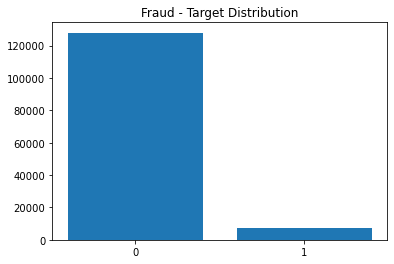

In [54]:
#Dataset is highly imbalanced
fraudactivities = clients_df.groupby(['target'])['client_id'].count()
plt.bar(x=fraudactivities.index, height=fraudactivities.values, tick_label = [0,1])
plt.title('Fraud - Target Distribution')
plt.show()

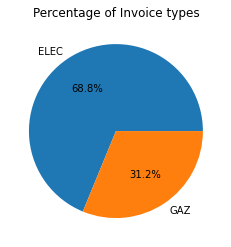

In [55]:
#Showing pie chart for Electricity and Gas invoices
counts = invoices_df['counter_type'].value_counts()
percentages = (counts / len(invoices_df)) * 100

plt.pie(percentages, labels=counts.index, autopct='%1.1f%%')
plt.title('Percentage of Invoice types')
plt.show()

Feature Engineering

Aggregate invoices statistics on client id (mean, max, min, std)

In [56]:
agg_stat_columns = [
'client_id',
 'reading_remarque',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'months_number',
]

clients_df['target'] = clients_df['target'].astype(int) # convert to int from float

# Split invoices df accordting to elec or gaz
invoice_elec_df = invoices_df[invoices_df["counter_type"] == "ELEC"].drop(["counter_type"], axis=1)
invoice_gaz_df = invoices_df[invoices_df["counter_type"] == "GAZ"].drop(["counter_type"], axis=1)

# groupby client_id and calculate mean,min,max,std for each interesting statistic
avg_grouped_invoice_elec_df = invoice_elec_df[agg_stat_columns].groupby("client_id").mean().add_prefix("avg_elec_")
avg_grouped_invoice_gaz_df = invoice_gaz_df[agg_stat_columns].groupby("client_id").mean().add_prefix("avg_gaz_")
min_grouped_invoice_elec_df = invoice_elec_df[agg_stat_columns].groupby("client_id").min().add_prefix("min_elec_")
min_grouped_invoice_gaz_df = invoice_gaz_df[agg_stat_columns].groupby("client_id").min().add_prefix("min_gaz_")
max_grouped_invoice_elec_df = invoice_elec_df[agg_stat_columns].groupby("client_id").max().add_prefix("max_elec_")
max_grouped_invoice_gaz_df = invoice_gaz_df[agg_stat_columns].groupby("client_id").max().add_prefix("max_gaz_")
std_grouped_invoice_elec_df = invoice_elec_df[agg_stat_columns].groupby("client_id").std().add_prefix("std_elec_")
std_grouped_invoice_gaz_df = invoice_gaz_df[agg_stat_columns].groupby("client_id").std().add_prefix("std_gaz_")

# join stats with the clients df
final_df = clients_df.merge(avg_grouped_invoice_elec_df, how="left", left_on="client_id", right_index=True)\
    .merge(avg_grouped_invoice_gaz_df, how="left", left_on="client_id", right_index=True)\
    .merge(min_grouped_invoice_elec_df, how="left", left_on="client_id", right_index=True)\
    .merge(min_grouped_invoice_gaz_df, how="left", left_on="client_id", right_index=True)\
    .merge(max_grouped_invoice_elec_df, how="left", left_on="client_id", right_index=True)\
    .merge(max_grouped_invoice_gaz_df, how="left", left_on="client_id", right_index=True)\
    .merge(std_grouped_invoice_elec_df, how="left", left_on="client_id", right_index=True)\
    .merge(std_grouped_invoice_gaz_df, how="left", left_on="client_id", right_index=True)

# drop unnecessary columns and fill NaN values with 0
final_df.drop(['client_id','disrict', 'region', 'creation_date'], axis=1, inplace=True)
final_df.fillna(0, inplace=True)

# display the final dataframe
final_df.head()

,client_catg,target,avg_elec_reading_remarque,avg_elec_consommation_level_1,avg_elec_consommation_level_2,avg_elec_consommation_level_3,avg_elec_consommation_level_4,avg_elec_months_number,avg_gaz_reading_remarque,avg_gaz_consommation_level_1,...,std_elec_consommation_level_2,std_elec_consommation_level_3,std_elec_consommation_level_4,std_elec_months_number,std_gaz_reading_remarque,std_gaz_consommation_level_1,std_gaz_consommation_level_2,std_gaz_consommation_level_3,std_gaz_consommation_level_4,std_gaz_months_number
0,11,0,6.971429,352.400000,10.571429,0.000000,0.000000,4.628571,0.0,0.0,...,43.568935,0.000000,0.000000,2.101620,0.0,0.0,0.0,0.0,0.0,0.0
1,11,0,7.216216,557.540541,0.000000,0.000000,0.000000,4.324324,0.0,0.0,...,0.000000,0.000000,0.000000,1.375461,0.0,0.0,0.0,0.0,0.0,0.0
2,11,0,7.055556,798.611111,37.888889,0.000000,0.000000,6.444444,0.0,0.0,...,160.748942,0.000000,0.000000,3.399346,0.0,0.0,0.0,0.0,0.0,0.0
3,11,0,6.150000,1.200000,0.000000,0.000000,0.000000,4.200000,0.0,0.0,...,0.000000,0.000000,0.000000,0.615587,0.0,0.0,0.0,0.0,0.0,0.0
4,11,0,8.857143,663.714286,104.857143,117.357143,36.714286,3.714286,0.0,0.0,...,167.155320,289.433294,105.421081,0.726273,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
final_df.to_csv('final_df.csv', index=False)

In [58]:
final_df.shape

(135493, 50)

In [59]:
final_df.isnull().sum() # No nulll values after filling with zeros

client_catg                      0
target                           0
avg_elec_reading_remarque        0
avg_elec_consommation_level_1    0
avg_elec_consommation_level_2    0
avg_elec_consommation_level_3    0
avg_elec_consommation_level_4    0
avg_elec_months_number           0
avg_gaz_reading_remarque         0
avg_gaz_consommation_level_1     0
avg_gaz_consommation_level_2     0
avg_gaz_consommation_level_3     0
avg_gaz_consommation_level_4     0
avg_gaz_months_number            0
min_elec_reading_remarque        0
min_elec_consommation_level_1    0
min_elec_consommation_level_2    0
min_elec_consommation_level_3    0
min_elec_consommation_level_4    0
min_elec_months_number           0
min_gaz_reading_remarque         0
min_gaz_consommation_level_1     0
min_gaz_consommation_level_2     0
min_gaz_consommation_level_3     0
min_gaz_consommation_level_4     0
min_gaz_months_number            0
max_elec_reading_remarque        0
max_elec_consommation_level_1    0
max_elec_consommatio